In [ ]:
// A macro to plot a spectrogram(?) of the power (Y) vs Frq bin (X) over a series of events

In [1]:
gROOT->ProcessLine(".L /home/rj/app/lib/libRadioScatter.so");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatter.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RSEventSummary.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatterEvent.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/TUtilRadioScatter.hh>");
TString infile = "/home/rj/RadioScatter/doc/smallmultiscat_0MHz_10W_10ns.root";
auto ff=TFile::Open(infile, "READ");
TFile *outfile = new TFile("/home/rj/RadioScatter/outputfiles/voltage_time_angle.root", "RECREATE");
TTree *outtree = new TTree("tree", "test label");

int rxindex = 0;
int txindex = 0;
int antenna = 0;
int entry = 0;
auto tree=(TTree*)ff->Get("tree");


In [2]:
auto event= new RadioScatterEvent();
tree->SetBranchAddress("event", &event);
tree->GetEntry(29);
// tree->GetEntries();
// cout << event->nrx;
auto c1 = TUtilRadioScatter::canvas();
TCanvas *c2 = new TCanvas("c2","c2",200,10,1200,1000);


In [3]:
c1->Clear();
auto evG=event->getGraph(rxindex, txindex);
TUtilRadioScatter::titles(evG, "", "Time [ns]", "V");
TUtilRadioScatter::style(evG, kBlack, 1, 1);
TUtilRadioScatter::xrange(evG, evG->GetX()[0], evG->GetX()[evG->GetN()-1]);
int bins = 32, overlap = 31;
auto spec=TUtilRadioScatter::FFT::spectrogram(evG, bins, overlap, bins*2, 2,   0,     0,    .2);

int NumFreqBins=spec->GetNbinsX();
int NumTimeBins=spec->GetNbinsY();
cout << NumFreqBins << endl;
cout << NumTimeBins << endl;
cout << spec->GetXaxis()->GetBinWidth(1556) << endl;
double *points = new double[NumFreqBins];
double *itt = new double[NumTimeBins];


Float_t xmax = 1;
Float_t xmin = 0;
// spec->ProfileY()->Draw();
c1->SetLogy(0);
// evG->Draw();
spec->Draw("colz");
// c1->Draw();


199
64
1


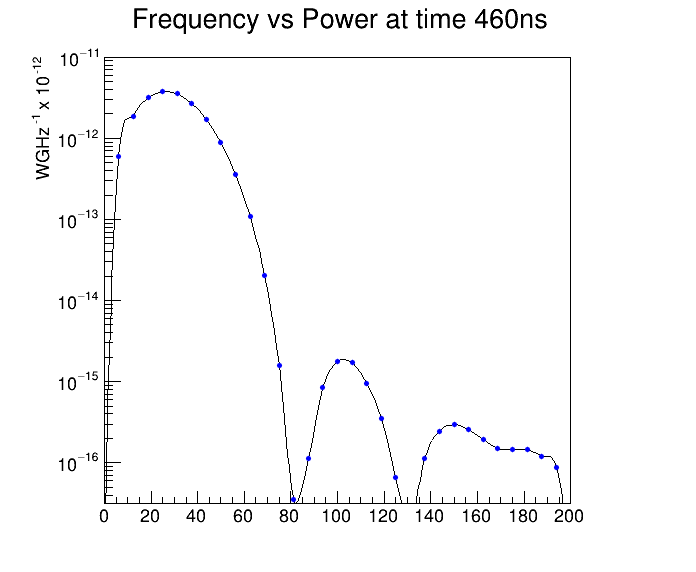

460 0 0
460 6.25 5.94791e-13
460 12.5 1.87368e-12
460 18.75 3.14736e-12
460 25 3.76432e-12
460 31.25 3.53057e-12
460 37.5 2.69944e-12
460 43.75 1.70287e-12
460 50 8.79256e-13
460 56.25 3.59807e-13
460 62.5 1.08393e-13
460 68.75 2.04289e-14
460 75 1.59853e-15
460 81.25 3.48087e-17
460 87.5 1.13423e-16
460 93.75 8.53509e-16
460 100 1.76212e-15
460 106.25 1.70098e-15
460 112.5 9.55906e-16
460 118.75 3.47838e-16
460 125 6.65573e-17
460 131.25 9.98936e-18
460 137.5 1.12586e-16
460 143.75 2.45954e-16
460 150 2.93889e-16
460 156.25 2.56819e-16
460 162.5 1.92154e-16
460 168.75 1.50638e-16
460 175 1.45241e-16
460 181.25 1.44442e-16
460 187.5 1.20891e-16
460 193.75 8.72185e-17
460 200 0
460 206.25 0
460 212.5 0
460 218.75 0
460 225 0
460 231.25 0
460 237.5 0
460 243.75 0
460 250 0
460 256.25 0
460 262.5 0
460 268.75 0
460 275 0
460 281.25 0
460 287.5 0
460 293.75 0
460 300 0
460 306.25 0
460 312.5 0
460 318.75 0
460 325 0
460 331.25 0
460 337.5 0
460 343.75 0
460 350 0
460 356.25 0
460 362.5 0
4

In [4]:
c1->SetLogy(1);
c1->SetLogx(0);
double *pows = new double[NumFreqBins];
double *ybin = new double[NumFreqBins];
double_t iterator = 0;
int i=460 - 390;
for(int j = 0; j < spec->GetNbinsY(); j++){
    if(j==0){
        pows[j]=0;
        }
    else{
        pows[j]=spec->GetBinContent(i,j);
        }
    ybin[j] = j*.00625*1000; // y bin number x .2GHz/32bins * 1000MHz/GHz
    cout << 390+i << " " << ybin[j] << " " << pows[j] << endl;
    iterator ++;
}
TGraph *gr = new TGraph(NumFreqBins, ybin, pows);
gr->GetYaxis()->SetRangeUser(1*pow(10,-16.5), 1*pow(10,-11));
gr->SetMarkerColor(4);
gr->SetMarkerSize(.5);
gr->SetMarkerStyle(20);
gr->GetXaxis()->SetLimits(0,200);
gr->SetTitle(Form("Frequency vs Power at time %dns", 390+i));
gr->GetXaxis()->SetTitle("");
gr->GetYaxis()->SetTitle("WGHz^{-1} x 10^{-12}");
gr->Draw("ACP");
c1->Draw();

In [ ]:
//converts vectors to arrays sliced by x (time) bin
counter = 0;
double_t xbinarray[12736];
double_t ybinarray[12736];
double_t zdataarray[12736];
for(int i = 0; i < 64; ++i){
    xbinarray[i] = xbin[i];
    ybinarray[i] = ybin[i];
    zdataarray[i] = zdata[i];
    cout << i << " " << ybinarray[i] << " " << zdataarray[i] << endl;
    counter ++;
    }

// TGraph *gr = new TGraph(counter,&ybin[0],&zdata[0]);
TGraph *gr = new TGraph(counter,ybinarray,zdataarray);
    gr->SetMarkerColor(4);
    gr->SetMarkerSize(.5);
    gr->SetMarkerStyle(20);
    gr->SetTitle("change_my_name");
    gr->GetXaxis()->SetTitle("change_my_name (x unit)");
    gr->GetYaxis()->SetTitle("change_my_name (y unit)");
    gr->GetXaxis()->SetLimits(0,64);
//     gr->GetYaxis()->SetLimits(0,150);
    gr->GetYaxis()->SetRangeUser(0, 1*pow(10,-24));
    c1->SetLogy(0);

    gr->Draw("ACP");
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
    c1->Draw();
//    c1->SaveAs("/home/rj/new/change_my_name.png");
// c1->SetLogy(0);


In [ ]:
Int_t counter = 0;
vector<vector<double_t>> hist;
for(int i = 0; i <= spec->GetNbinsX(); ++i){
    vector<double_t> row;
    for(int j = 0; j <= spec->GetNbinsY(); ++j){
        row.push_back(spec->GetBinContent(i,j));
        counter ++;
    }
    hist.push_back(row);
}
    //print the 2d vector
vector<double_t> xbin;
vector<double_t> ybin;
vector<double_t> zdata;
counter = 0;
    for(int i = 0; i < spec->GetNbinsX(); ++i){
//     i = 19;
        for(int j = 0; j < spec->GetNbinsY(); ++j){
            counter ++;
            xbin.push_back(64);
            ybin.push_back(counter);
            zdata.push_back(hist[i][j]);
            cout << j << " " << ybin[j] << " " << zdata << endl;
        }
    }
cout << xbin.size() << endl;
cout << ybin.size() << endl;


In [ ]:
auto mg = new TMultiGraph("mg","mg");   
// TGraph *g1 = new TGraph(counter,&ybin[0],&zdata[0]);
TGraph *g1 = new TGraph(counter,&ybinarray[0],&zdataarray[0]);
    
        g1->SetMarkerColor(4);
        g1->SetMarkerSize(.5);
        g1->SetMarkerStyle(20);
        g1->SetTitle("change_my_name");
        g1->GetXaxis()->SetTitle("change_my_name (x unit)");
        g1->GetYaxis()->SetTitle("change_my_name (y unit)");
        g1->GetYaxis()->SetRangeUser(0, 1*pow(10,-19));
        g1->Draw("AC");
//         c1->Draw();
    //    c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
int count[0];
vector<double_t> frqs;
vector<double_t> pows;
int itt = 0;

// for(int i = 0; i < spec->GetNbinsX(); ++i){ //loops over number of time bins ()
for(int i = 0; i < 50; ++i){ //loops over number of time bins ()
// int i = 75;
    for(int j = 0; j < spec->GetNbinsY(); ++j){ //loops over number of frequency bins
//     cout << j << ", " << spec->GetYaxis()->GetBinCenter(j)*1000 << "MHz" << endl;//prints the bin number and its center in X scale
//     cout << spec->GetBinContent(i,j) << "\n" << endl;
//         count[i] = i;
        itt ++;
//         pows[i] = 1;
//         pows.push_back(spec->GetYaxis()->GetBinCenter(spec->GetBin(i,j)));
//         frqs.push_back(spec->GetYaxis()->GetBinCenter(j));
        cout << itt << " " << j << endl;
        }
}

// cout << frqs[10] << endl;
// cout << pows[10] << endl;

In [ ]:
for(int i = 0; i < spec->GetNbinsX(); ++i){ //loops over number of time bins
    for(int j = 0; j < spec->GetNbinsY(); ++j){ //loops over number of frequency bins
//         if(spec->Integral(0,199,0,j,"") > (3.2592 * pow(10,-6)))
//     cout << i << ", " << spec->GetXaxis()->GetBinCenter(i) << endl;//prints the bin number and its center in X scale
//     cout << j << ", " << spec->GetYaxis()->GetBinCenter(j)*1000 << "MHz" << endl;
        cout << "xbin:" << j << ", " << "ybin: " << i << " " << 
            spec->GetYaxis()->GetBinCenter(spec->GetBin(i,j)) << "W/_Hz" << endl;
        //prints the bin number and its center in X scale
    cout << spec->GetBinContent(j) << endl;
        }
}

In [ ]:
// spec->Draw("lego");
spec->Draw("colz");
c1->Draw();

In [ ]:
cout << spec->Integral(49,50,0,64,"") << endl; //1.511e-11
cout << spec->Integral(0,199,0,64,"") << endl; //all arrays 3.259

cout << spec->GetXaxis()->GetBinCenter(75) << endl; //465.78

cout << spec->GetXaxis()->GetXmin() << endl; //391.28
cout << spec->GetXaxis()->GetXmax() << endl; //590.28
cout << spec->GetYaxis()->GetXmin() << endl; //0
cout << spec->GetYaxis()->GetXmax() << endl; //1

cout << spec->GetBin(79,21) << endl;
cout << spec->GetBinContent(4300) << endl;
cout << spec->GetBin(50,21) << endl;
cout << spec->GetBinContent(4271) << endl;
cout << spec->GetBin(40,21) << endl;
cout << spec->GetBinContent(4261) << endl;
cout << spec->GetBin(160,21) << endl;
cout << spec->GetBinContent(4381) << endl;

In [ ]:
// TGraph *gr = new TGraph(counter,powers,itteration);
// gr->SetMarkerColor(4);
// gr->SetMarkerSize(.3);
// gr->SetMarkerStyle(20);
// gr->SetTitle("Clever Title");
// gr->GetXaxis()->SetTitle("power/freq (W/GHz)");
// gr->GetYaxis()->SetTitle("change_my_name (y unit)");
// gr->GetXaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the x axis by values*10^-6
// gr->Draw("ac"); //axis, points, curve
// //     c1->Update();
// //     c1->GetFrame()->SetBorderSize(100);
// //     c1->Modified();
// c1->Draw();
// c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
TGraph *gr = new TGraph(counter,powers,itteration);
    gr->SetMarkerColor(4);
    gr->SetMarkerSize(.5);
    gr->SetMarkerStyle(20);
    gr->SetTitle("change_my_name");
    gr->GetXaxis()->SetTitle("change_my_name (x unit)");
    gr->GetYaxis()->SetTitle("change_my_name (y unit)");
    gr->GetXaxis()->SetLimits(-0.15*std::pow(10,-6),.3*std::pow(10,-6));
    gr->Draw("AP");
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
    c1->Draw();
   c1->SaveAs("/home/rj/new/change_my_name.png");


In [ ]:

float **frqs = new float*[NumFreqBins];
for(int i = 0; i < NumFreqBins; ++i){
    frqs[i] = new float[event->nrx];
}
//make a 2d array of size (entries, rxs)
float **pows = new float*[NumIntensBins];
for(int i = 0; i < NumIntensBins; ++i){
    pows[i] = new float[event->nrx];
}


In [ ]:
//Not functional 
//for comparison to the above graph to verify that they aren't the same (hopefully)
TGraph *gr = new TGraph(counter,something,something_else);
    gr->SetMarkerColor(4);
    gr->SetMarkerSize(.3);
    gr->SetMarkerStyle(20);
    gr->SetTitle("change_my_name");
    gr->GetXaxis()->SetTitle("change_my_name (x unit)");
    gr->GetYaxis()->SetTitle("change_my_name (y unit)");
    gr->GetYaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the y axis by values*10^-6
    gr->GetXaxis()->SetLimits(-10,200); 

    gr->Draw("ac"); //axis, points, curve
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
    c1->Draw();
//    c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
//Stuff below this probably doesn't work as intended (if at all)

In [ ]:
//Not sure what this graphs but it isn't what was intended
//graph populator
cout << "yep1" << endl;
Float_t *powers = new Float_t[x.size()];
Float_t *itteration = new Float_t[y.size()];
cout << event->nrx << tree->GetEntries() << endl;
int counter = 0;
for(int i = 0; i < 200; ++i){ //loops over number of frq bins
    for(int j = 0; j <= 64; ++j){ //loops over number of intensity bins
        //TODO: auto populate number of bins from variable, not user
        if(abs(spec->GetBinContent(i,j)) > (1 * std::pow(10,-11.23))){
//                cout << "bin\(" << i << ", " << j <<  ") contents: " << spec->GetBinContent(i,j) << endl;
            powers[counter] = spec->GetBinContent(i,j); //fills powers array with intensity of each bin
            cout << "powers[" << counter << "]: " << powers[counter] << endl;
            itteration[counter] = counter; //fills array for y axis of graph
            counter++; //counts the loop number
}}}

TGraph *gr = new TGraph(counter,powers,itteration);
gr->SetMarkerColor(4);
gr->SetMarkerSize(.3);
gr->SetMarkerStyle(20);
gr->SetTitle("Clever Title");
gr->GetXaxis()->SetTitle("power/freq (W/GHz)");
gr->GetYaxis()->SetTitle("change_my_name (y unit)");
gr->GetXaxis()->SetLimits(-0.10*std::pow(10,-6),.3*std::pow(10,-6)); //constrains the x axis by values*10^-6
gr->Draw("ac"); //axis, points, curve
//     c1->Update();
//     c1->GetFrame()->SetBorderSize(100);
//     c1->Modified();
c1->Draw();
c1->SaveAs("/home/rj/new/change_my_name.png");

In [ ]:
//I think this one does work
//loops through events to do whatever you make it do. Probably could be used to loop over all rxs and txs

int entries = tree->GetEntries();
int rxs = event->nrx;
float **power_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    power_array[i] = new float[rxs];
}
float **freq_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    freq_array[i] = new float[rxs];
}
auto *freqs = new double[30][3];
auto *pows = new double[30][3];
double frq;
double pow;
double thresh = 20e-6; 
cout << "Trigger threshold is: " << thresh << "\n" << endl;
for(int k = 0; k < tree->GetEntries(); k++){
    tree->GetEntry(k); 
    int trig=0,num=0;
    for(int i=0;i<event->ntx;i++){
        for(int j=0;j<event->nrx;j++){
            trig=event->peakV(i,j)>=thresh?1:0;
            if(trig==1){
                num++;
                // Meat goes here
                frq = event->peakFreq(0,j);
                pow = event->peakPowerW(0,j);
                freq_array[k][j]=frq;
                power_array[k][j]=pow;
            }
            else{
                freq_array[k][j] = 0;
            }
            if(num>=event->nrx){
                
            }
        }
    }
}
double *allfreqs = new double[90];
double *allpows = new double[90];
int count = 0;
for(int entry = 0; entry < tree->GetEntries()-1; entry++){
    for(int rx = 0; rx < event->nrx; rx++){
//         cout << "event " << entry << " freq: " << freq_array[entry][rx] << "MHz, power: " << power_array[entry][rx] << endl;
        allfreqs[count] = freq_array[entry][rx];
        allpows[count]= power_array[entry][rx];
        count++;
    }
}

In [ ]:
c1->SetLogy(1);
const Int_t n = 90;
TGraph *gr = new TGraph(n,allfreqs,allpows);
gr->SetMarkerColor(4);
// gr->SetMarkerStyle(2);
gr->SetMarkerStyle(20);
gr->SetTitle("Triggered Event Peak Frequency vs Peak Power");
gr->GetXaxis()->SetTitle("Peak Frequency (MHz)");
gr->GetYaxis()->SetTitle("Peak Power (W)");
gr->Draw("AP");
c1->Update();
c1->GetFrame()->SetBorderSize(100);
c1->Modified();
c1->Draw();

In [ ]:
const Int_t n = 100;
auto spectrum=event->getSpectrum(rxindex, txindex);
double NumFreqBins=spectrum->GetNbinsX();
double NumIntensBins=spectrum->GetNbinsY();

double tempstuff;
      cout << "FBins: " << NumFreqBins << " IBins: " << NumIntensBins << endl;

for(int i = 1; i < NumFreqBins+1; ++i){
//   for(int j = 0; j < NumIntensBins; ++j){
//       tempstuff = spectrum->GetBinContent(j,i);
//       cout << tempstuff << endl;
      cout << "bin: " << i <<  " contents: " << spectrum->GetBinContent(i) << endl;
//         cout << spectrum->GetBinContent(j,i) << endl;
        
    // Fill e.g. a TGraph with (freq of freq bin #i, GetBinContent(j,i)
//   }
}
// TGraph *graph=new TGraph(n,NumFreqBins,NumIntensBins);


spectrum->Draw();
c1->Draw();
